<h3><center>Clase ejercicios 02 - IMA539.</center></h3>
<center>Camilo Calfucoy, Jorge Ruíz</center>

<center>Departamento de Ingeniería Matemática</center>

<center>Septiembre 23, 2024.</center>

## Ejercicios propuestos:

1. Cargue la base de datos `Pokemon_DB.csv` en un DataFrame utilizando Pandas.

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score ,recall_score

In [2]:
import pandas as pd
df= pd.read_csv('Pokemon_DB.csv')
df.head()

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
0,Bulbasaur,1,Grass,0.7,6.9,Green,Ordinary,45.0,49,49,65,65,45
1,Ivysaur,1,Grass,1.0,13.0,Green,Ordinary,60.0,62,63,80,80,60
2,Venusaur,1,Grass,2.0,100.0,Green,Ordinary,80.0,82,83,100,100,80
3,Mega Venusaur,1,Grass,2.4,155.5,Green,Ordinary,80.0,100,123,122,120,80
4,Charmander,1,Fire,0.6,8.5,Red,Ordinary,39.0,52,43,60,50,65


In [3]:
print(df.shape)


(1203, 13)


In [4]:
df.describe(include='all')

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
count,1203,1203.000000,1203,1203.000000,1203.000000,1203,1182,1179.000000,1203,1203.000000,1203.000000,1203.000000,1203
unique,1202,NaN,18,NaN,NaN,10,4,NaN,170,NaN,NaN,NaN,167
top,Oinkologne,NaN,Water,NaN,NaN,Blue,Ordinary,NaN,100,NaN,NaN,NaN,50
freq,2,NaN,151,NaN,NaN,201,1029,NaN,69,NaN,NaN,NaN,60
mean,NaN,4.830424,NaN,1.370158,72.737490,NaN,NaN,70.923664,NaN,74.474647,72.985037,72.043225,NaN
std,NaN,2.601901,NaN,3.163398,132.754115,NaN,NaN,26.669153,NaN,30.591098,32.657015,27.543458,NaN
min,NaN,1.000000,NaN,0.100000,0.000000,NaN,NaN,1.000000,NaN,5.000000,10.000000,20.000000,NaN
25%,NaN,3.000000,NaN,0.600000,8.800000,NaN,NaN,53.000000,NaN,51.500000,50.000000,50.000000,NaN
50%,NaN,5.000000,NaN,1.000000,30.000000,NaN,NaN,70.000000,NaN,70.000000,65.000000,70.000000,NaN
75%,NaN,7.000000,NaN,1.600000,75.000000,NaN,NaN,85.000000,NaN,90.000000,95.000000,90.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1203 non-null   object 
 1   Generation  1203 non-null   int64  
 2   Type1       1203 non-null   object 
 3   Height      1203 non-null   float64
 4   Weight      1203 non-null   float64
 5   Color       1203 non-null   object 
 6   Category    1182 non-null   object 
 7   HP          1179 non-null   float64
 8   Attack      1203 non-null   object 
 9   Defense     1203 non-null   int64  
 10  SP_Attack   1203 non-null   int64  
 11  SP_Defense  1203 non-null   int64  
 12  Speed       1203 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 122.3+ KB


2. Realice un análisis exploratorio de los datos identificando variables numéricas y categóricas. Si las variables categórica no están definidas como tal, modifique su tipo. 

In [6]:
df.dtypes

Name           object
Generation      int64
Type1          object
Height        float64
Weight        float64
Color          object
Category       object
HP            float64
Attack         object
Defense         int64
SP_Attack       int64
SP_Defense      int64
Speed          object
dtype: object

In [7]:
df['Name'] = df['Name'].astype('category')
df['Type1'] = df['Type1'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Category'] = df['Category'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        1203 non-null   category
 1   Generation  1203 non-null   int64   
 2   Type1       1203 non-null   category
 3   Height      1203 non-null   float64 
 4   Weight      1203 non-null   float64 
 5   Color       1203 non-null   category
 6   Category    1182 non-null   category
 7   HP          1179 non-null   float64 
 8   Attack      1203 non-null   object  
 9   Defense     1203 non-null   int64   
 10  SP_Attack   1203 non-null   int64   
 11  SP_Defense  1203 non-null   int64   
 12  Speed       1203 non-null   object  
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 133.5+ KB


In [9]:
df.describe(include='all')

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
count,1203,1203.000000,1203,1203.000000,1203.000000,1203,1182,1179.000000,1203,1203.000000,1203.000000,1203.000000,1203
unique,1202,NaN,18,NaN,NaN,10,4,NaN,170,NaN,NaN,NaN,167
top,Oinkologne,NaN,Water,NaN,NaN,Blue,Ordinary,NaN,100,NaN,NaN,NaN,50
freq,2,NaN,151,NaN,NaN,201,1029,NaN,69,NaN,NaN,NaN,60
mean,NaN,4.830424,NaN,1.370158,72.737490,NaN,NaN,70.923664,NaN,74.474647,72.985037,72.043225,NaN
std,NaN,2.601901,NaN,3.163398,132.754115,NaN,NaN,26.669153,NaN,30.591098,32.657015,27.543458,NaN
min,NaN,1.000000,NaN,0.100000,0.000000,NaN,NaN,1.000000,NaN,5.000000,10.000000,20.000000,NaN
25%,NaN,3.000000,NaN,0.600000,8.800000,NaN,NaN,53.000000,NaN,51.500000,50.000000,50.000000,NaN
50%,NaN,5.000000,NaN,1.000000,30.000000,NaN,NaN,70.000000,NaN,70.000000,65.000000,70.000000,NaN
75%,NaN,7.000000,NaN,1.600000,75.000000,NaN,NaN,85.000000,NaN,90.000000,95.000000,90.000000,NaN


3. Limpieza de los datos:

    - Cuántas observaciones faltan por cada variable? 
    - Si faltan datos de una variable numérica estos deben rellenarse con el valor promedio de la variable. 
    - Las filas en las cuales falte el dato de alguna variable categórica deben ser eliminadas.
    - Las variables Attack y Speed pero tuvieron problemas al ser ingresadas. Revisar si pueden rectificarse levemente para que puedan ser convertidas a numéricas.

Observaciones:

- La variable Category es categórica y le faltan observaciones.

- HP es numérica y le faltan datos que deben ser completados por valor promedio.

- La Columna Category es categórica y tiene datos faltantes por lo que deben eliminarse esas filas.

- Las Columnas ATTACK y SPEED son realmente variables numéricas, pero contienen errores de ingreso ('j' incluída).
Deben rectificarse algunas entradas para obtener los valores correctos.

In [10]:
df.isnull().sum()

Name           0
Generation     0
Type1          0
Height         0
Weight         0
Color          0
Category      21
HP            24
Attack         0
Defense        0
SP_Attack      0
SP_Defense     0
Speed          0
dtype: int64

In [11]:
print(f'HP es numérica y le faltan {df.HP.isnull().sum()} datos')

HP es numérica y le faltan 24 datos


In [12]:
print(f'HP es categótica y le faltan {df.Category.isnull().sum()} datos')

HP es categótica y le faltan 21 datos


In [13]:
# Eliminando fila con el dato faltante en la variable 'Category'

df_1=df.dropna(subset=['Category'])

In [14]:
df_1.describe(include='all')

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
count,1182,1182.000000,1182,1182.000000,1182.000000,1182,1182,1159.000000,1182,1182.000000,1182.000000,1182.000000,1182
unique,1181,NaN,18,NaN,NaN,10,4,NaN,169,NaN,NaN,NaN,167
top,Oinkologne,NaN,Water,NaN,NaN,Blue,Ordinary,NaN,100,NaN,NaN,NaN,50
freq,2,NaN,148,NaN,NaN,197,1029,NaN,67,NaN,NaN,NaN,60
mean,NaN,4.833333,NaN,1.366159,72.887648,NaN,NaN,70.993960,NaN,74.275804,72.909475,71.992386,NaN
std,NaN,2.604654,NaN,3.183883,133.687936,NaN,NaN,26.733879,NaN,30.328628,32.508936,27.233940,NaN
min,NaN,1.000000,NaN,0.100000,0.000000,NaN,NaN,1.000000,NaN,5.000000,10.000000,20.000000,NaN
25%,NaN,3.000000,NaN,0.600000,8.725000,NaN,NaN,53.000000,NaN,51.000000,50.000000,50.000000,NaN
50%,NaN,5.000000,NaN,1.000000,29.750000,NaN,NaN,70.000000,NaN,70.000000,65.000000,70.000000,NaN
75%,NaN,7.000000,NaN,1.600000,72.750000,NaN,NaN,85.000000,NaN,90.000000,95.000000,90.000000,NaN


In [15]:
df_1.isnull().sum()

Name           0
Generation     0
Type1          0
Height         0
Weight         0
Color          0
Category       0
HP            23
Attack         0
Defense        0
SP_Attack      0
SP_Defense     0
Speed          0
dtype: int64

In [16]:
HP_promedio=df_1.HP.mean()
HP_promedio

70.9939603106126

In [17]:
sum(df_1['HP'].isnull())

23

In [18]:
df_1.loc[df_1['HP'].isnull(),'HP']=HP_promedio

In [19]:
df_1.isnull().sum()

Name          0
Generation    0
Type1         0
Height        0
Weight        0
Color         0
Category      0
HP            0
Attack        0
Defense       0
SP_Attack     0
SP_Defense    0
Speed         0
dtype: int64

In [20]:
df_1.describe(include='all')

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
count,1182,1182.000000,1182,1182.000000,1182.000000,1182,1182,1182.000000,1182,1182.000000,1182.000000,1182.000000,1182
unique,1181,NaN,18,NaN,NaN,10,4,NaN,169,NaN,NaN,NaN,167
top,Oinkologne,NaN,Water,NaN,NaN,Blue,Ordinary,NaN,100,NaN,NaN,NaN,50
freq,2,NaN,148,NaN,NaN,197,1029,NaN,67,NaN,NaN,NaN,60
mean,NaN,4.833333,NaN,1.366159,72.887648,NaN,NaN,70.993960,NaN,74.275804,72.909475,71.992386,NaN
std,NaN,2.604654,NaN,3.183883,133.687936,NaN,NaN,26.472278,NaN,30.328628,32.508936,27.233940,NaN
min,NaN,1.000000,NaN,0.100000,0.000000,NaN,NaN,1.000000,NaN,5.000000,10.000000,20.000000,NaN
25%,NaN,3.000000,NaN,0.600000,8.725000,NaN,NaN,54.000000,NaN,51.000000,50.000000,50.000000,NaN
50%,NaN,5.000000,NaN,1.000000,29.750000,NaN,NaN,70.000000,NaN,70.000000,65.000000,70.000000,NaN
75%,NaN,7.000000,NaN,1.600000,72.750000,NaN,NaN,84.750000,NaN,90.000000,95.000000,90.000000,NaN


In [21]:
sum(df_1['HP']==HP_promedio)

23

In [22]:
sum(df_1.Attack.apply(lambda x: isinstance(x,str)))

1182

In [23]:
def noesconvertible_a_float(x):
    try:
        y= float(x)
        return False
    except ValueError:
        return True

df_1.loc[df_1.Attack.apply(noesconvertible_a_float),'Attack']

22       80j
41       9j2
48       41j
67       3j5
68       6j5
126      6j5
128      4j8
135      5j0
172      j10
181      60j
223      40j
226      20j
227      j40
284     10j5
295      j95
314      45j
322      j70
339      70j
341      j70
343      5j5
351      3j0
359      j90
369      j65
376     11j0
390      7j3
422      81j
528     136j
539      25j
546     170j
559      j69
609      j60
632      55j
647      80j
678      8j6
684      j30
687      7j8
693      j65
807      3j8
839      j77
855      j66
884      j74
896      7j0
984      j86
1044     65j
1080    13j0
1094     65j
1097     45j
1100     j41
1117     j96
1137    j100
1141     5j0
1144     4j5
Name: Attack, dtype: object

In [24]:
def convierte_a_float(x):
    if x.find('j')!=-1:
        x=x.replace('j','')
    return float(x)
    
df_1['Attack']=df_1['Attack'].apply(convierte_a_float)

C:\Users\newma\AppData\Local\Temp\ipykernel_13244\2665460260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Attack']=df_1['Attack'].apply(convierte_a_float)


In [25]:
df_1.describe()

,Generation,Height,Weight,HP,Attack,Defense,SP_Attack,SP_Defense
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,4.833333,1.366159,72.887648,70.993960,80.791032,74.275804,72.909475,71.992386
std,2.604654,3.183883,133.687936,26.472278,31.944906,30.328628,32.508936,27.233940
min,1.000000,0.100000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000
25%,3.000000,0.600000,8.725000,54.000000,56.000000,51.000000,50.000000,50.000000
50%,5.000000,1.000000,29.750000,70.000000,79.500000,70.000000,65.000000,70.000000
75%,7.000000,1.600000,72.750000,84.750000,100.000000,90.000000,95.000000,90.000000
max,9.000000,100.000000,999.900000,255.000000,190.000000,250.000000,194.000000,250.000000


In [26]:
sum(df_1.Speed.apply(lambda x: isinstance(x,str)))

1182

In [27]:
df_1.loc[df_1.Speed.apply(noesconvertible_a_float),'Speed']

22      101j
41       j76
48       65j
67       9j0
68       j40
126     1j30
128      j42
135     15j0
172      8j0
181      40j
223      j60
226      20j
227      j40
284      4j5
295      85j
314      7j0
322      j40
339      70j
341      60j
343      8j5
351      65j
359     j160
369      9j0
376      5j0
390      j55
422      4j3
528     135j
539      6j0
546      j92
559      j91
609      8j3
632      29j
647      j35
678      6j0
684      3j0
687      22j
693      6j5
807      j42
839      5j8
855      41j
884      j60
896      93j
984      j94
1044     j65
1080     j85
1094     j50
1097     35j
1100     20j
1117     j92
1137     7j5
1141     j45
1144     5j8
Name: Speed, dtype: object

In [28]:
df_1['Speed']=df_1['Speed'].apply(convierte_a_float)

C:\Users\newma\AppData\Local\Temp\ipykernel_13244\3292336142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Speed']=df_1['Speed'].apply(convierte_a_float)


In [29]:
df_1.describe(include='all')

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
count,1182,1182.000000,1182,1182.000000,1182.000000,1182,1182,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
unique,1181,NaN,18,NaN,NaN,10,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Oinkologne,NaN,Water,NaN,NaN,Blue,Ordinary,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,148,NaN,NaN,197,1029,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.833333,NaN,1.366159,72.887648,NaN,NaN,70.993960,80.791032,74.275804,72.909475,71.992386,69.917936
std,NaN,2.604654,NaN,3.183883,133.687936,NaN,NaN,26.472278,31.944906,30.328628,32.508936,27.233940,30.165968
min,NaN,1.000000,NaN,0.100000,0.000000,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,NaN,3.000000,NaN,0.600000,8.725000,NaN,NaN,54.000000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,NaN,5.000000,NaN,1.000000,29.750000,NaN,NaN,70.000000,79.500000,70.000000,65.000000,70.000000,68.000000
75%,NaN,7.000000,NaN,1.600000,72.750000,NaN,NaN,84.750000,100.000000,90.000000,95.000000,90.000000,91.000000


In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        1182 non-null   category
 1   Generation  1182 non-null   int64   
 2   Type1       1182 non-null   category
 3   Height      1182 non-null   float64 
 4   Weight      1182 non-null   float64 
 5   Color       1182 non-null   category
 6   Category    1182 non-null   category
 7   HP          1182 non-null   float64 
 8   Attack      1182 non-null   float64 
 9   Defense     1182 non-null   int64   
 10  SP_Attack   1182 non-null   int64   
 11  SP_Defense  1182 non-null   int64   
 12  Speed       1182 non-null   float64 
dtypes: category(4), float64(5), int64(4)
memory usage: 141.0 KB


In [31]:
df_1_describe_numeric= df_1.describe()
df_1_describe_numeric

,Generation,Height,Weight,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,4.833333,1.366159,72.887648,70.993960,80.791032,74.275804,72.909475,71.992386,69.917936
std,2.604654,3.183883,133.687936,26.472278,31.944906,30.328628,32.508936,27.233940,30.165968
min,1.000000,0.100000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,3.000000,0.600000,8.725000,54.000000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,5.000000,1.000000,29.750000,70.000000,79.500000,70.000000,65.000000,70.000000,68.000000
75%,7.000000,1.600000,72.750000,84.750000,100.000000,90.000000,95.000000,90.000000,91.000000
max,9.000000,100.000000,999.900000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [32]:
# Chequeando Outliers (IQR - Rule)
# lower_bound= Q1 - 1.5*(Q3-Q1)
# upper_bound= Q3 + 1.5*(Q3-Q1)

# Generation
Q1=df_1_describe_numeric.loc['25%']
Q3=df_1_describe_numeric.loc['75%']
IQR=Q3-Q1
print(1.5*IQR)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR


Generation     6.0000
Height         1.5000
Weight        96.0375
HP            46.1250
Attack        66.0000
Defense       58.5000
SP_Attack     67.5000
SP_Defense    60.0000
Speed         69.0000
dtype: float64


In [33]:
UB

Generation     13.0000
Height          3.1000
Weight        168.7875
HP            130.8750
Attack        166.0000
Defense       148.5000
SP_Attack     162.5000
SP_Defense    150.0000
Speed         160.0000
dtype: float64

In [34]:
# Lower Bound outliers
Outliers_LB=LB>df_1_describe_numeric.loc['min']
print(Outliers_LB)


Generation    False
Height        False
Weight        False
HP             True
Attack        False
Defense       False
SP_Attack     False
SP_Defense    False
Speed         False
dtype: bool


In [35]:
Outliers_LB

Generation    False
Height        False
Weight        False
HP             True
Attack        False
Defense       False
SP_Attack     False
SP_Defense    False
Speed         False
dtype: bool

In [36]:

Variables_with_outliers_LB=Outliers_LB.index[Outliers_LB].tolist()
print(Variables_with_outliers_LB)


['HP']


In [37]:
type(Variables_with_outliers_LB[0])

outliers_indices=df_1[Variables_with_outliers_LB[0]]< LB[Variables_with_outliers_LB[0]]
rows_with_outliers=set(df_1.index[outliers_indices].tolist())
df_1.loc[outliers_indices,Variables_with_outliers_LB[0]]


360    1.0
Name: HP, dtype: float64

In [38]:

print(f' Variable {Variables_with_outliers_LB[0]} tiene {len(rows_with_outliers)} outliers inferiores.')
#rows_with_outliers
total_outliers_indices=rows_with_outliers

 Variable HP tiene 1 outliers inferiores.


In [39]:
print(total_outliers_indices)

{360}


In [40]:
# Upper Bound outliers
Outliers_UB=UB<df_1_describe_numeric.loc['max']
print(Outliers_UB)


Generation    False
Height         True
Weight         True
HP             True
Attack         True
Defense        True
SP_Attack      True
SP_Defense     True
Speed          True
dtype: bool


In [41]:
Variables_with_outliers_UB=Outliers_UB.index[Outliers_UB].tolist()
print(Variables_with_outliers_UB)


['Height', 'Weight', 'HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed']


In [42]:

for variable in Variables_with_outliers_UB:
    outliers_indices=df_1[variable]> UB[variable]
    rows_with_outliers=set(df_1.index[outliers_indices].tolist())
    #df_1.loc[outliers_indices,variable]
    print(f' Variable {variable} tiene {len(rows_with_outliers)} outliers superiores.')
    total_outliers_indices.update(rows_with_outliers)
    
print(f'En total hay {len(total_outliers_indices)} filas con outliers')


 Variable Height tiene 56 outliers superiores.
 Variable Weight tiene 125 outliers superiores.
 Variable HP tiene 24 outliers superiores.
 Variable Attack tiene 9 outliers superiores.
 Variable Defense tiene 23 outliers superiores.
 Variable SP_Attack tiene 13 outliers superiores.
 Variable SP_Defense tiene 7 outliers superiores.
 Variable Speed tiene 2 outliers superiores.
En total hay 169 filas con outliers


In [43]:
total_outliers_indices

{31,
 52,
 85,
 98,
 99,
 108,
 122,
 126,
 127,
 138,
 150,
 173,
 174,
 175,
 188,
 196,
 197,
 199,
 200,
 233,
 256,
 262,
 263,
 272,
 286,
 303,
 304,
 305,
 306,
 309,
 310,
 311,
 312,
 350,
 357,
 360,
 365,
 376,
 377,
 395,
 397,
 398,
 426,
 443,
 444,
 458,
 459,
 460,
 461,
 462,
 463,
 468,
 469,
 470,
 471,
 472,
 473,
 476,
 477,
 478,
 481,
 503,
 525,
 537,
 546,
 547,
 552,
 563,
 565,
 567,
 576,
 580,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 606,
 610,
 640,
 660,
 680,
 722,
 742,
 752,
 768,
 769,
 770,
 775,
 776,
 779,
 780,
 781,
 809,
 819,
 837,
 839,
 843,
 848,
 861,
 862,
 865,
 866,
 867,
 869,
 870,
 873,
 874,
 894,
 908,
 910,
 930,
 943,
 948,
 957,
 958,
 959,
 961,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 974,
 975,
 979,
 1009,
 1014,
 1045,
 1053,
 1054,
 1056,
 1057,
 1063,
 1064,
 1065,
 1066,
 1067,
 1072,
 1073,
 1074,
 1077,
 1078,
 1081,
 1093,
 1121,
 1156,
 1163,
 1165,
 1170,
 1171,
 1172,
 1173,
 1175,
 1179,
 1181,
 11

In [44]:
df_1.shape
df_2=df_1.drop(list(total_outliers_indices))

In [45]:
df_1

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
0,Bulbasaur,1,Grass,0.7,6.9,Green,Ordinary,45.0,49.0,49,65,65,45.0
1,Ivysaur,1,Grass,1.0,13.0,Green,Ordinary,60.0,62.0,63,80,80,60.0
2,Venusaur,1,Grass,2.0,100.0,Green,Ordinary,80.0,82.0,83,100,100,80.0
3,Mega Venusaur,1,Grass,2.4,155.5,Green,Ordinary,80.0,100.0,123,122,120,80.0
4,Charmander,1,Fire,0.6,8.5,Red,Ordinary,39.0,52.0,43,60,50,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,Iron Valiant,9,Fairy,1.4,35.0,White,Semi-Legendary,74.0,130.0,90,120,60,116.0
1199,Koraidon,9,Fighting,2.5,303.0,Red,Legendary,100.0,135.0,115,85,100,135.0
1200,Miraidon,9,Electric,3.5,240.0,Blue,Legendary,100.0,85.0,100,135,115,135.0
1201,Walking Wake,9,Water,3.5,280.0,Blue,Semi-Legendary,99.0,83.0,91,125,83,109.0


In [46]:
df_2

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
0,Bulbasaur,1,Grass,0.7,6.9,Green,Ordinary,45.0,49.0,49,65,65,45.0
1,Ivysaur,1,Grass,1.0,13.0,Green,Ordinary,60.0,62.0,63,80,80,60.0
2,Venusaur,1,Grass,2.0,100.0,Green,Ordinary,80.0,82.0,83,100,100,80.0
3,Mega Venusaur,1,Grass,2.4,155.5,Green,Ordinary,80.0,100.0,123,122,120,80.0
4,Charmander,1,Fire,0.6,8.5,Red,Ordinary,39.0,52.0,43,60,50,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Wo-Chien,9,Dark,1.5,74.2,Brown,Semi-Legendary,85.0,85.0,100,95,135,70.0
1194,Chien-Pao,9,Dark,1.9,152.2,White,Semi-Legendary,80.0,120.0,80,90,65,135.0
1196,Chi-Yu,9,Dark,0.4,4.9,Red,Semi-Legendary,55.0,80.0,80,135,120,100.0
1198,Iron Valiant,9,Fairy,1.4,35.0,White,Semi-Legendary,74.0,130.0,90,120,60,116.0


4. Genere un grafico de tortas que muestre el porcentaje del total de datos
que pertenece a cada clase de la variable `Category` y la cantidad de datos por clase.


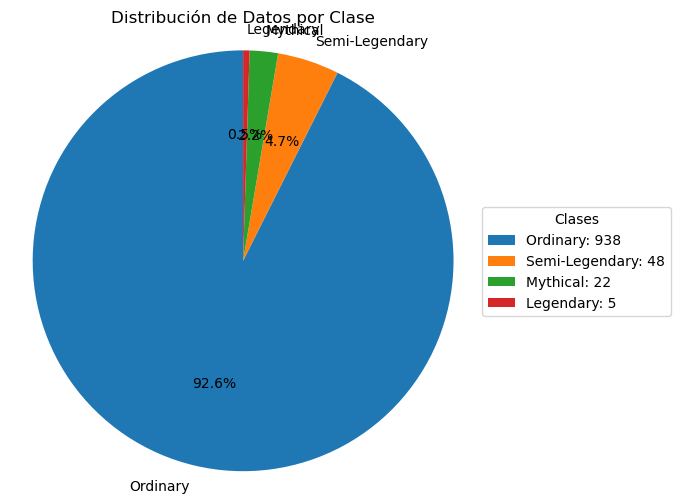

In [47]:
import matplotlib.pyplot as plt

class_counts = df_2['Category'].value_counts()
#print(class_counts)


plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)

labels = [f'{label}: {count}' for label, count in zip(class_counts.index, class_counts)]


plt.legend(labels, title="Clases", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Distribución de Datos por Clase")
plt.axis('equal')  
plt.show()


5. Reemplazar la columna `Category` por valores numericos 


In [48]:
df_2['Category'] = df_2['Category'].astype('category').cat.codes


In [49]:
df_2['Category'] = df_2['Category'].astype('category')

In [50]:
df_2.describe(include='all')

,Name,Generation,Type1,Height,Weight,Color,Category,HP,Attack,Defense,SP_Attack,SP_Defense,Speed
count,1013,1013.000000,1013,1013.000000,1013.000000,1013,1013.0,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
unique,1012,NaN,18,NaN,NaN,10,4.0,NaN,NaN,NaN,NaN,NaN,NaN
top,Oinkologne,NaN,Water,NaN,NaN,Blue,2.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,130,NaN,NaN,168,938.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.795656,NaN,0.966338,35.074038,NaN,NaN,66.096629,76.081935,68.850938,69.544916,68.423495,69.081935
std,NaN,2.608647,NaN,0.560986,35.736810,NaN,NaN,20.114823,29.006136,24.658948,29.985590,24.423821,29.276051
min,NaN,1.000000,NaN,0.100000,0.100000,NaN,NaN,10.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,NaN,3.000000,NaN,0.500000,7.500000,NaN,NaN,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000
50%,NaN,5.000000,NaN,0.900000,22.500000,NaN,NaN,65.000000,74.000000,65.000000,65.000000,65.000000,66.000000
75%,NaN,7.000000,NaN,1.400000,52.000000,NaN,NaN,78.000000,95.000000,85.000000,90.000000,85.000000,90.000000


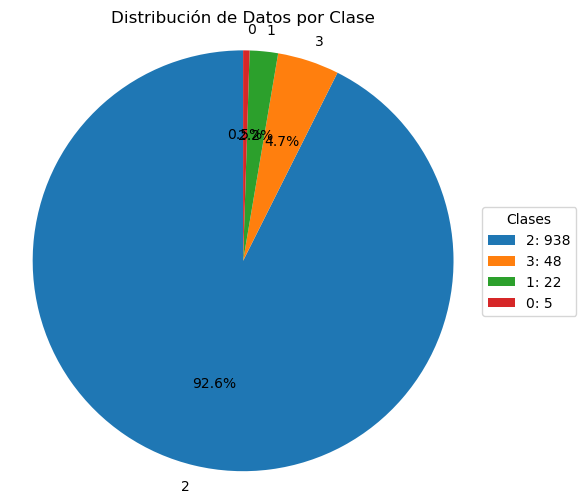

In [51]:
class_counts = df_2['Category'].value_counts()
#print(class_counts)


plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)

labels = [f'{label}: {count}' for label, count in zip(class_counts.index, class_counts)]


plt.legend(labels, title="Clases", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Distribución de Datos por Clase")
plt.axis('equal')  
plt.show()


6. Encuentre dos variables numéricas que no sean linealmente separable y grafíquelas. 

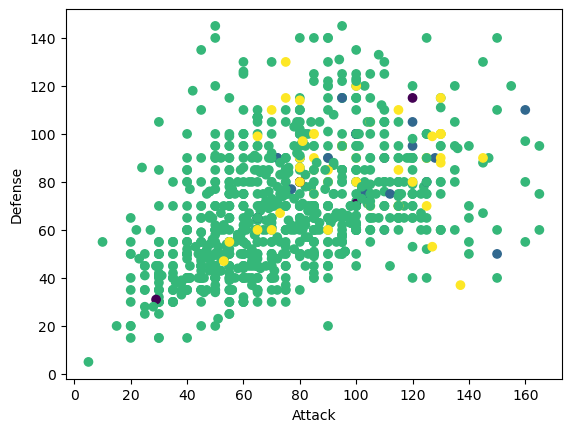

In [52]:
import matplotlib.pyplot as plt

x1 = df_2['Attack']
x2 = df_2['Defense']

plt.scatter(x1, x2, c=df_2['Category'], cmap='viridis')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

7. Genere una matriz `X` que contenga todas las variables numéricas, que utilizaremos para clasificar. Por otra parte en el vector `y` considere la variable objetivo  `Category`.

In [53]:
X = df_2.drop(columns=["Category","Name","Color","Type1"]).values

y = df_2['Category'].values

8. Crear un conjunto de entrenamiento utilizando el 70% de los datos y dejar el restante 30% para el conjunto de testeo.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


9. Escalar las características de `X` utilizando StandardScaler

In [55]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

10. Utilizar el conjunto de entrenamiento para entrenar los siguientes tres modelos de clasificacion:
- SVM
- Random Forest
- KNN
Pruebe con varios hyperparámetros para cada modelo.

In [56]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)


knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski', n_jobs=-1)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

11. Prediga sobre el conjunto de testeo con los 3 modelos entrenados.

In [57]:
y_pred_knn= knn.predict(X_test)
y_pred_svm =svm.predict(X_test)
y_pred_forest=forest.predict(X_test)

12. Evalúa el rendimiento de los tres modelos usando accuracy como métrica. Indique explique que magnitud refleja esta metrica

In [58]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.9210526315789473


In [59]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9243421052631579


In [60]:
accuracy = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy)

Accuracy: 0.9407894736842105


13. Escoja el mejor modelo y en genere dos gráficos de torta indicando las proporciones de clases. Un gráfico basado en las clases predichas por el modelo  sobre el conjunto de testeo y otro con las clases reales del test.

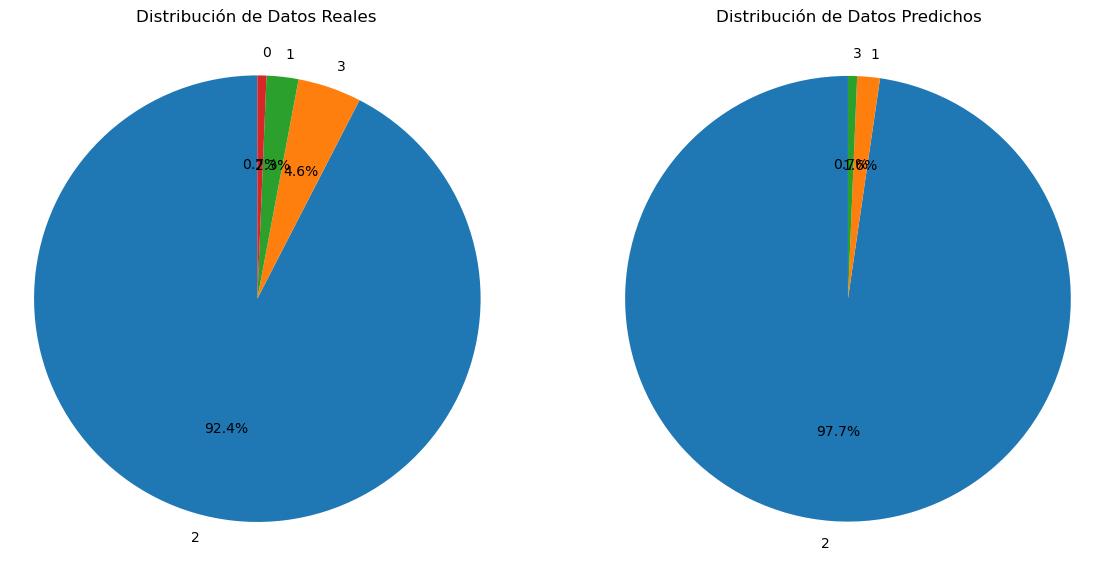

In [61]:
import matplotlib.pyplot as plt

# Contar la cantidad de datos en cada clase para y_real y y_pred
real_counts = pd.Series(y_test).value_counts()
pred_counts = pd.Series(y_pred_forest).value_counts()

# Crear la figura para ambos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de torta para y_real
ax1.pie(real_counts, labels=real_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Distribución de Datos Reales")

# Gráfico de torta para y_pred
ax2.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Distribución de Datos Predichos")

# Asegurarse de que ambos gráficos sean circulares
ax1.axis('equal')
ax2.axis('equal')

plt.show()
